In [1]:
import os
from os.path import join, isfile
from pathlib import Path
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
from random import choice
from natsort import natsorted
import cv2

(PosixPath('data/train/images/3-frame_2201.png'), PosixPath('data/train/labels/3-frame_2201.txt'))


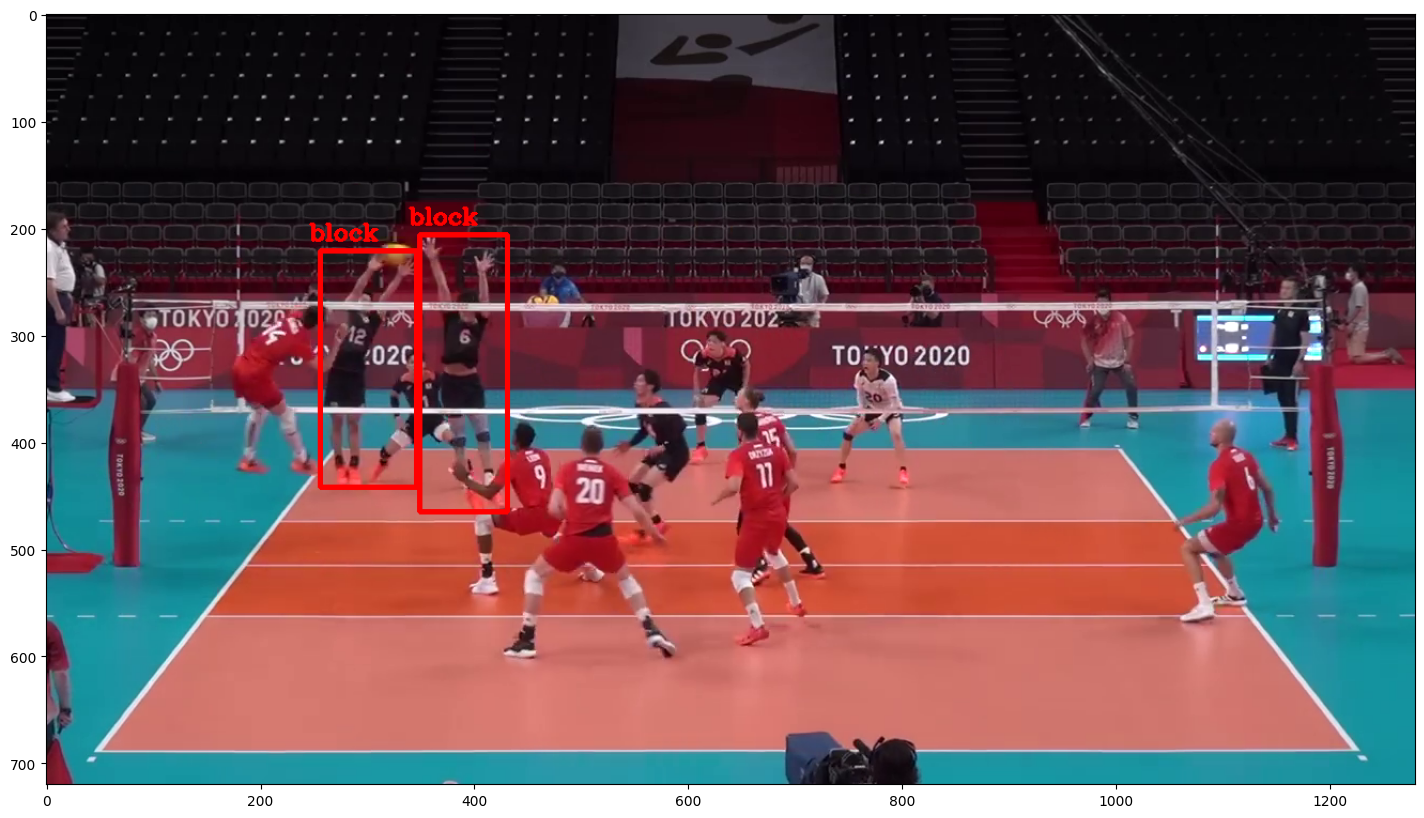

In [23]:
image_paths = 'data/train/images/'
label_paths = 'data/train/labels/'

images = natsorted(list(Path(image_paths).glob('*.png')))
labels = natsorted(list(Path(label_paths).glob('*.txt')))

def read_txt(file):
    items = open(file.as_posix()).read().split("\n")
    if not len(items):
        return None
    annots = []
    for item in items:
        if item == '':
            continue
        cl, x_cen, y_cen, bbox_w, bbox_h = [float(i) for i in item.split(' ')]
        annots.append([cl, x_cen, y_cen, bbox_w, bbox_h])
    return annots

def read_img(img):
    img_path = img.as_posix()
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, 4)
    h, w, _ = img.shape
    return img, w, h

pairs = list(zip(images, labels))
pair = choice(pairs)
img, txt = pair
img, img_w, img_h = read_img(img)
annots = read_txt(txt)
print(pair)
for annot in annots:
    dic = {0: 'spike', 1: "block", 2: 'recieve', 3: 'set'}
    cl, x_cen, y_cen, bbox_w, bbox_h = annot
    cl = dic[int(cl)]
    x_cen = x_cen * img_w
    y_cen = y_cen * img_h

    bbox_w = bbox_w * img_w
    bbox_h = bbox_h * img_h
    x1 = int(x_cen - (bbox_w/2))
    x2 = int(x_cen + (bbox_w/2))
    y1 = int(y_cen - (bbox_h/2))
    y2 = int(y_cen + (bbox_h/2))
    img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 3, )
    img = cv2.putText(img, cl, (x1-10, y1-10), cv2.FONT_HERSHEY_COMPLEX, 0.7, (255, 0, 0), 2)

plt.imshow(img)


